<a href="https://colab.research.google.com/github/Adityamg107/Project2/blob/main/Diwali_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("drive")

In [ ]:
os.chdir("MyDrive")

In [ ]:
os.chdir("datasets")

In [ ]:
os.listdir()

['train_schedule.csv',
 'googleplaystore.csv',
 'deliveries.csv',
 'matches.csv',
 'Smartphones_cleaned_dataset.csv',
 'train_info.csv',
 'IPL2025Batters.csv',
 'Diwali Sales Data (1).csv']

In [ ]:
data=pd.read_csv("Diwali Sales Data (1).csv",encoding="latin-1")
data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


Numpy

In [ ]:
# 1. Average amount spent
avg_amt= np.mean(data["Amount"])
print("Average Amount Spent:", avg_amt)

Average Amount Spent: 9453.610857727557


In [ ]:
# 2. Maximum order amount
max_amt = np.max(data["Amount"])
data[data["Amount"]==max_amt]


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN


In [ ]:
# 3. Standard deviation of amount
std_amt = np.std(data["Amount"])
print("Std Dev of Amount:", std_amt)

Std Dev of Amount: 5222.123532143989


In [ ]:
# 4. Total revenue
total_revenue = np.sum(data["Amount"])
print("Total Revenue:", total_revenue)


Total Revenue: 106249132.43


In [ ]:
# 5. Unique states and total amount spent by each state
state_amount = data.groupby("State")["Amount"].sum()
state_amount


,Amount
State,
Andhra Pradesh,8037146.99
Bihar,4022757.00
Delhi,11603819.45
Gujarat,3946082.00
Haryana,4220175.00
Himachal Pradesh,4963368.00
Jharkhand,3026456.00
Karnataka,13523540.00
Kerala,3894491.99


PANDAS

In [ ]:
# 1. Total sales by gender
data.groupby("Gender")["Amount"].sum()

,Amount
Gender,
F,74335856.43
M,31913276.00


In [ ]:
# 2. Average amount by age group
data.groupby("Age Group")["Amount"].mean()

,Amount
Age Group,
0-17,9120.449324
18-25,9175.482704
26-35,9384.154138
36-45,9699.954223
46-50,9367.084435
51-55,9953.586747
55+,9557.346604


In [ ]:
# 3. Top 5 states by total sales
data.groupby("State")["Amount"].sum().sort_values(ascending=False).head(5)

,Amount
State,
Uttar Pradesh,19374968.00
Maharashtra,14427543.00
Karnataka,13523540.00
Delhi,11603819.45
Madhya Pradesh,8101142.00


In [ ]:
# 4. Count of orders by occupation
data["Occupation"].value_counts()

,count
Occupation,
IT Sector,1588
Healthcare,1408
Aviation,1310
Banking,1139
Govt,854
Hospitality,705
Media,637
Automobile,566
Chemical,542


In [ ]:
# 5. Highest spending customer
data.groupby("Cust_name")["Amount"].sum().sort_values(ascending=False).head(1)

,Amount
Cust_name,
Vishakha,382782.0


Matplotlib

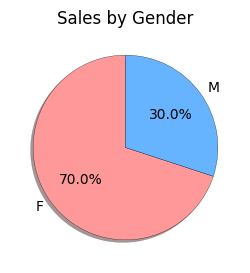

In [ ]:
# 1)Pie Chart - Sales by Gender
plt.figure(figsize=(3, 3))
sales_by_gender = data.groupby("Gender")["Amount"].sum()
color = ["#ff9999", "#66b3ff"]
plt.pie(sales_by_gender,labels=sales_by_gender.index ,autopct='%1.1f%%', startangle=90,shadow=True,radius=1.0,wedgeprops={"edgecolor": "black", "linewidth": 0.2},colors=color)
plt.title("Sales by Gender")
plt.show()

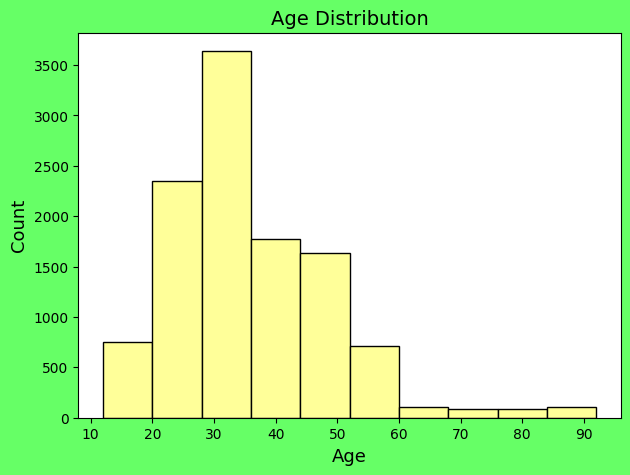

In [ ]:
# 2)Histogram - Age Distribution
plt.figure(figsize=(7, 5), facecolor="#66ff66")
plt.hist(data=data,x="Age", bins=10, color='#ffff99', edgecolor='black')
plt.xlabel("Age",size=13)
plt.ylabel("Count",size=13)
plt.title("Age Distribution",fontdict={"color": "black", "fontsize": 14})
plt.show()

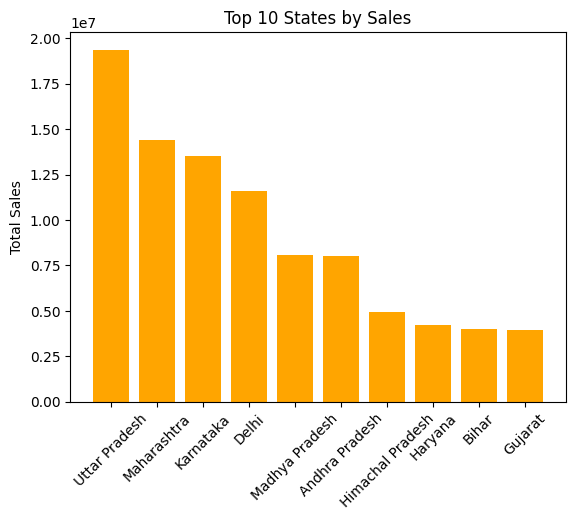

In [ ]:
#3) Bar Graph - Sales by State
sales_by_state = data.groupby("State")["Amount"].sum().sort_values(ascending=False).head(10)
plt.bar(sales_by_state.index, sales_by_state.values, color='orange')
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.title("Top 10 States by Sales")
plt.show()


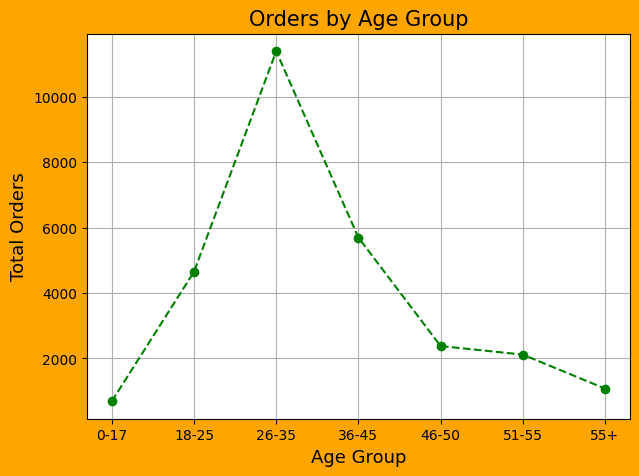

In [ ]:
# 4)Line Graph - Orders by Age Group
plt.figure(figsize=(7, 5), facecolor="orange")
orders_by_age = data.groupby("Age Group")["Orders"].sum()
plt.plot(orders_by_age.index, orders_by_age.values, marker='o', color='green',linestyle="--")
plt.ylabel("Total Orders",size=13)
plt.xlabel("Age Group",size=13)
plt.title("Orders by Age Group",size=15)
plt.grid(True)
plt.show()


Seaborn

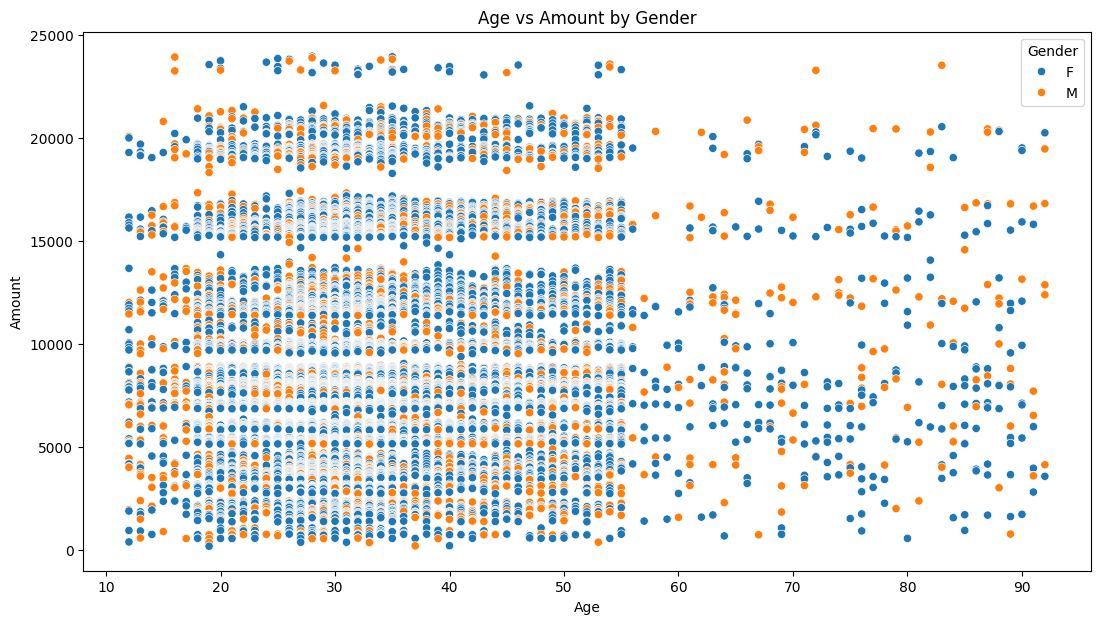

In [ ]:
#1)scatter Plot - Age vs Amount
plt.figure(figsize=(13, 7))
sns.scatterplot(data=data, x="Age", y="Amount", hue="Gender")
plt.title("Age vs Amount by Gender")
plt.show()

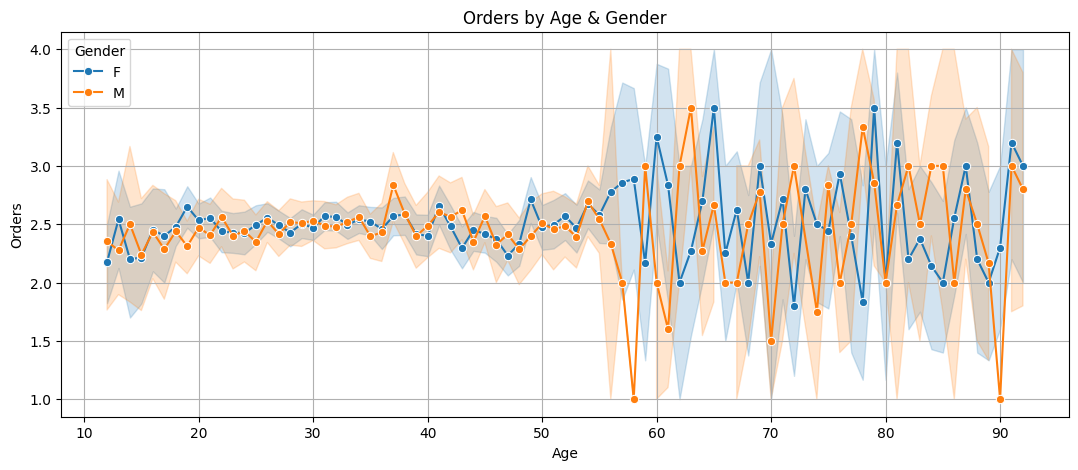

In [ ]:

#2)Line Plot - Orders by Age
plt.figure(figsize=(13, 5))
sns.lineplot(data=data, x="Age", y="Orders", hue="Gender", marker='o')
plt.title("Orders by Age & Gender")
plt.grid(True)
plt.show()

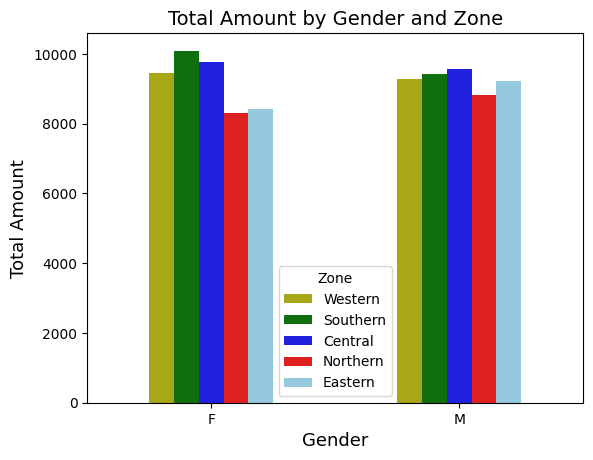

In [ ]:
#3)Bar Plot - Amount by Gender and Zone
sns.barplot(data=data, x="Gender", y="Amount",errorbar=('ci',False),width=0.5,hue="Zone",palette=["y","g","b","r","skyblue"])
plt.title("Total Amount by Gender and Zone",size=14)
plt.ylabel("Total Amount",size=13)
plt.xlabel("Gender",size=13)
plt.show()

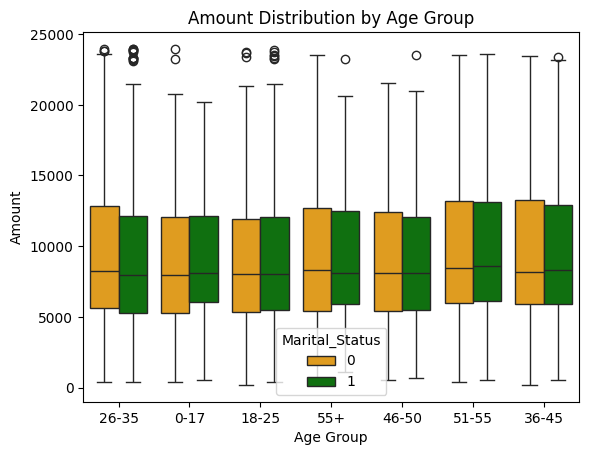

In [ ]:
#4)Box Plot - Amount by Age Group
sns.boxplot(data=data, x="Age Group", y="Amount",hue="Marital_Status", palette=["orange","g"])
plt.title("Amount Distribution by Age Group")
plt.show()

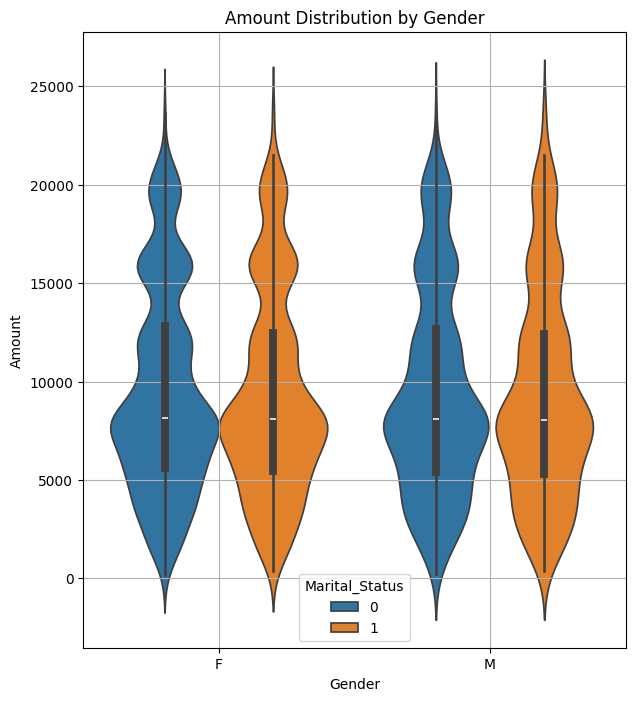

In [ ]:
#5)Violin Plot - Amount spent according to marital_status and by Gender
plt.figure(figsize=(7, 8))
sns.violinplot(data=data, x="Gender", y="Amount",hue="Marital_Status")
plt.title("Amount Distribution by Gender")
plt.grid(True)
plt.show()

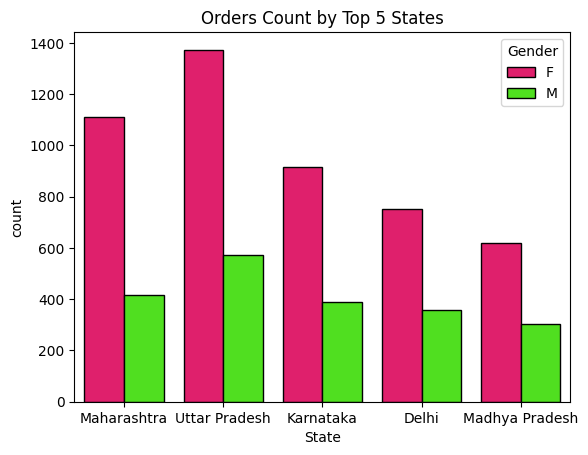

In [ ]:
#6)Count Plot - Orders by State (Top 5)
top_states = data["State"].value_counts().head(5).index
sns.countplot(data=data[data["State"].isin(top_states)], x="State", hue="Gender",edgecolor="k", palette=["#ff0066","#40ff00"])
plt.title("Orders Count by Top 5 States")
plt.show()


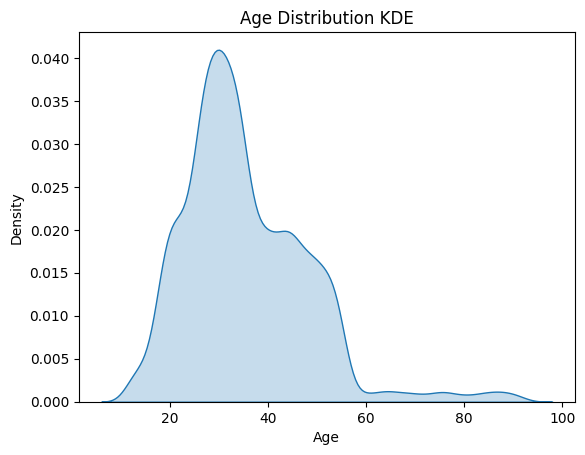

In [ ]:
#7)KDE Plot - Age
sns.kdeplot(data=data, x="Age", fill=True)
plt.title("Age Distribution KDE")
plt.show()

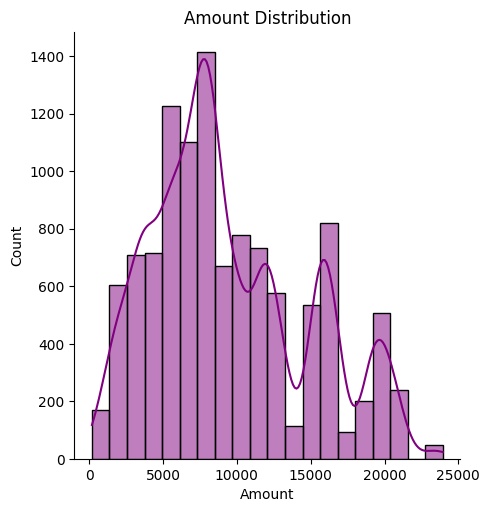

In [ ]:
#8)Distribution Plot - Amount
sns.displot(data=data, x="Amount", kde=True, bins=20, color='purple',kind="hist")
plt.title("Amount Distribution")
plt.show()